In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24
plt.rcParams["mathtext.fontset"] = "stix"  # The setting of math font

In [2]:
dataset = []

for center in [0, 1, 2, 3]:
    data = {"0": [], "1": [], "2": [], "4": [], "8": []}
    for seed in range(20):
        path = f"extra-results/center={center}_seed{seed:0>2}.json"
        for k, v in json.load(open(path)).items():
            data[k].append(v)
    else:
        data = {k: np.array(v) for k, v in data.items()}
        dataset.append(data)

In [3]:
def plot(ax, data, title, legend=False):
    dx = np.arange(200) + 1
    cm = plt.get_cmap("gist_rainbow")

    for idx, (_n_tasks, vals) in enumerate(data.items()):
        n_tasks = int(_n_tasks)
        color = cm(((idx + 0.5)) / 5)
        cum = np.minimum.accumulate(vals, axis=-1)
        m = np.mean(cum, axis=0)
        s = np.std(cum, axis=0) / np.sqrt(cum.shape[0])
        ax.plot(dx, m, color=color, label=f"$T={n_tasks}$")
        ax.fill_between(dx, m - s, m + s, alpha=0.2, color=color)

    ax.grid()
    ax.set_title(title)
    ax.set_yscale("log")
    ax.grid(which="minor", color="gray", linestyle=":")
    ax.grid(which="major", color="black")
    ax.set_xlim(1, 200)
    ax.set_ylim(7 * 10 ** 4, 10 ** 7)
    if legend:
        ax.legend()

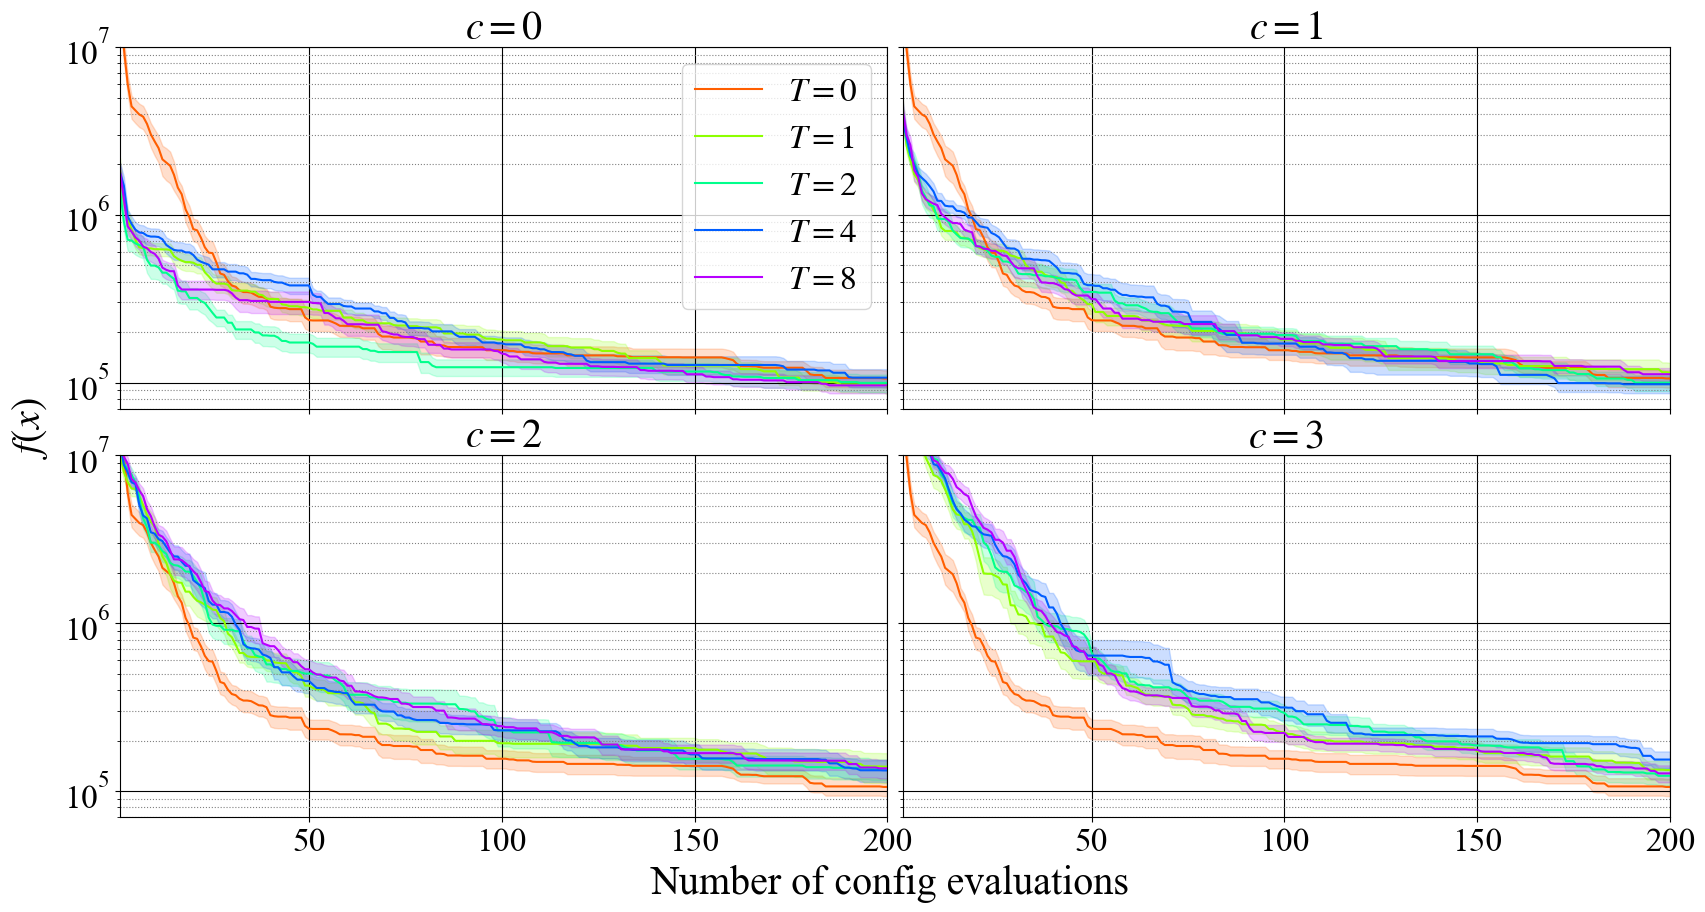

In [4]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(20, 10),
    gridspec_kw=dict(
        wspace=0.02,
        hspace=0.13,
    )
)

plot(axes[0][0], dataset[0], title="$c = 0$", legend=True)
plot(axes[0][1], dataset[1], title="$c = 1$")
plot(axes[1][0], dataset[2], title="$c = 2$")
plot(axes[1][1], dataset[3], title="$c = 3$")

fig.supxlabel("Number of config evaluations", x=0.51, y=0.025)
fig.supylabel("$f(x)$", x=0.07, y=0.5)

plt.savefig("ntasks-analysis.pdf", bbox_inches="tight")